In [1]:
import pandas as pd
import json

# Caminho do arquivo
caminho_arquivo = '/content/TelecomX_Data (1).json'

# Carregar o arquivo JSON
with open(caminho_arquivo, 'r', encoding='utf-8') as f:
    dados_json = json.load(f)

# Transformar em DataFrame
df = pd.json_normalize(dados_json)

# Visualizar as 5 primeiras linhas
print(df.head())


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [2]:
# Ver colunas e tipos de dados
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
# Mostra a quantidade de valores ausentes por coluna
print(df.isnull().sum())


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [4]:
# Verifica se há linhas duplicadas
print(df.duplicated().sum())


0


In [5]:
# Verifica valores únicos em colunas categóricas importantes
colunas_categoricas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
                       'phone.PhoneService', 'phone.MultipleLines',
                       'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                       'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                       'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling',
                       'account.PaymentMethod']

for col in colunas_categoricas:
    print(f"\nValores únicos em {col}:")
    print(df[col].unique())



Valores únicos em Churn:
['No' 'Yes' '']

Valores únicos em customer.gender:
['Female' 'Male']

Valores únicos em customer.Partner:
['Yes' 'No']

Valores únicos em customer.Dependents:
['Yes' 'No']

Valores únicos em phone.PhoneService:
['Yes' 'No']

Valores únicos em phone.MultipleLines:
['No' 'Yes' 'No phone service']

Valores únicos em internet.InternetService:
['DSL' 'Fiber optic' 'No']

Valores únicos em internet.OnlineSecurity:
['No' 'Yes' 'No internet service']

Valores únicos em internet.OnlineBackup:
['Yes' 'No' 'No internet service']

Valores únicos em internet.DeviceProtection:
['No' 'Yes' 'No internet service']

Valores únicos em internet.TechSupport:
['Yes' 'No' 'No internet service']

Valores únicos em internet.StreamingTV:
['Yes' 'No' 'No internet service']

Valores únicos em internet.StreamingMovies:
['No' 'Yes' 'No internet service']

Valores únicos em account.Contract:
['One year' 'Month-to-month' 'Two year']

Valores únicos em account.PaperlessBilling:
['Yes' 'No']


In [6]:
import pandas as pd
import numpy as np

# Supondo que seu dataframe se chame df
# Exemplo: df = pd.read_csv('seu_arquivo.csv')

# 1. Tratar strings vazias na coluna Churn substituindo por np.nan
df['Churn'] = df['Churn'].replace('', np.nan)

# 2. Remover linhas onde Churn está nulo (se preferir manter, pode imputar ou tratar de outra forma)
df = df.dropna(subset=['Churn'])

# 3. Padronizar valores "No phone service" e "No internet service" para "No" em colunas específicas
cols_phone_service = ['phone.MultipleLines']
cols_internet_service = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in cols_phone_service:
    df[col] = df[col].replace('No phone service', 'No')

for col in cols_internet_service:
    df[col] = df[col].replace('No internet service', 'No')

# 4. Verificar se ainda há valores faltantes
print("Valores faltantes por coluna após limpeza:")
print(df.isnull().sum())

# Agora seus dados estão mais coerentes para próximas análises

# Se quiser salvar o resultado limpo:
# df.to_csv('telecomx_data_limpo.csv', index=False)

Valores faltantes por coluna após limpeza:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


/tmp/ipython-input-6-978435140.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('No phone service', 'No')
/tmp/ipython-input-6-978435140.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('No internet service', 'No')


In [7]:
import pandas as pd
import numpy as np

# Supondo que seu dataframe se chame df
# Exemplo: df = pd.read_csv('seu_arquivo.csv')

# 1. Tratar strings vazias na coluna Churn substituindo por np.nan
df['Churn'] = df['Churn'].replace('', np.nan)

# 2. Remover linhas onde Churn está nulo
df = df.dropna(subset=['Churn'])

# 3. Padronizar valores "No phone service" e "No internet service" para "No"
cols_phone_service = ['phone.MultipleLines']
cols_internet_service = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in cols_phone_service:
    df.loc[:, col] = df[col].replace('No phone service', 'No')

for col in cols_internet_service:
    df.loc[:, col] = df[col].replace('No internet service', 'No')

# 4. Verificar valores faltantes após limpeza
print("Valores faltantes por coluna após limpeza:")
print(df.isnull().sum())

# Opcional: salvar o dataframe limpo
# df.to_csv('telecomx_data_limpo.csv', index=False)


Valores faltantes por coluna após limpeza:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [8]:
# Criar a coluna Contas_Diarias dividindo o faturamento mensal por 30 dias
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Conferir os primeiros valores para ver se está correto
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())


   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [9]:
# 1. Mapear colunas que têm 'Yes'/'No' para 1/0
map_sim_nao = {'Yes': 1, 'No': 0}

cols_sim_nao = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in cols_sim_nao:
    df[col] = df[col].map(map_sim_nao)

# 2. Renomear colunas para português e sem pontos
df = df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Tempo_Cliente',
    'phone.PhoneService': 'Telefone_Servico',
    'phone.MultipleLines': 'Telefone_Multiplas_Linhas',
    'internet.InternetService': 'Internet_Servico',
    'internet.OnlineSecurity': 'Internet_Seguranca',
    'internet.OnlineBackup': 'Internet_Backup',
    'internet.DeviceProtection': 'Internet_Protecao',
    'internet.TechSupport': 'Internet_Suporte_Tecnico',
    'internet.StreamingTV': 'Internet_StreamingTV',
    'internet.StreamingMovies': 'Internet_StreamingFilmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total',
    'Contas_Diarias': 'Cobranca_Diaria'
})

# 3. (Opcional) Traduzir valores fixos de colunas categóricas
df['Genero'] = df['Genero'].map({'Female': 'Feminino', 'Male': 'Masculino'})

df['Contrato'] = df['Contrato'].map({
    'Month-to-month': 'Mensal',
    'One year': 'Um ano',
    'Two year': 'Dois anos'
})

df['Internet_Servico'] = df['Internet_Servico'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica',
    'No': 'Sem internet'
})

df['Metodo_Pagamento'] = df['Metodo_Pagamento'].map({
    'Mailed check': 'Cheque enviado',
    'Electronic check': 'Cheque eletrônico',
    'Credit card (automatic)': 'Cartão de crédito (automático)',
    'Bank transfer (automatic)': 'Transferência bancária (automática)'
})

# Verificando as primeiras linhas para conferir
print(df.head())


   ID_Cliente  Cancelou     Genero  Idoso  Parceiro  Dependentes  \
0  0002-ORFBO         0   Feminino      0         1            1   
1  0003-MKNFE         0  Masculino      0         0            0   
2  0004-TLHLJ         1  Masculino      0         0            0   
3  0011-IGKFF         1  Masculino      1         1            0   
4  0013-EXCHZ         1   Feminino      1         1            0   

   Tempo_Cliente  Telefone_Servico  Telefone_Multiplas_Linhas  \
0              9                 1                          0   
1              9                 1                          1   
2              4                 1                          0   
3             13                 1                          0   
4              3                 1                          0   

  Internet_Servico  ...  Internet_Protecao  Internet_Suporte_Tecnico  \
0              DSL  ...                  0                         1   
1              DSL  ...                  0              

In [10]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular estatísticas descritivas básicas
estatisticas = df[colunas_numericas].describe().T

# Calcular mediana separadamente (já que describe() não traz mediana)
estatisticas['mediana'] = df[colunas_numericas].median()

# Reordenar colunas para ficar mais intuitivo
estatisticas = estatisticas[['count', 'mean', 'mediana', 'std', 'min', '25%', '50%', '75%', 'max']]

print(estatisticas)


                            count       mean  mediana        std        min  \
Cancelou                   7043.0   0.265370    0.000   0.441561   0.000000   
Idoso                      7043.0   0.162147    0.000   0.368612   0.000000   
Parceiro                   7043.0   0.483033    0.000   0.499748   0.000000   
Dependentes                7043.0   0.299588    0.000   0.458110   0.000000   
Tempo_Cliente              7043.0  32.371149   29.000  24.559481   0.000000   
Telefone_Servico           7043.0   0.903166    1.000   0.295752   0.000000   
Telefone_Multiplas_Linhas  7043.0   0.421837    0.000   0.493888   0.000000   
Internet_Seguranca         7043.0   0.286668    0.000   0.452237   0.000000   
Internet_Backup            7043.0   0.344881    0.000   0.475363   0.000000   
Internet_Protecao          7043.0   0.343888    0.000   0.475038   0.000000   
Internet_Suporte_Tecnico   7043.0   0.290217    0.000   0.453895   0.000000   
Internet_StreamingTV       7043.0   0.384353    0.00

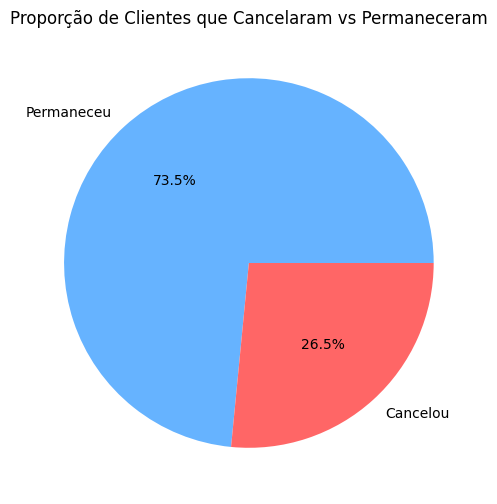

/tmp/ipython-input-11-2225257367.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_churn.index.map({0: 'Permaneceu', 1: 'Cancelou'}), y=contagem_churn.values, palette=['#66b3ff','#ff6666'])


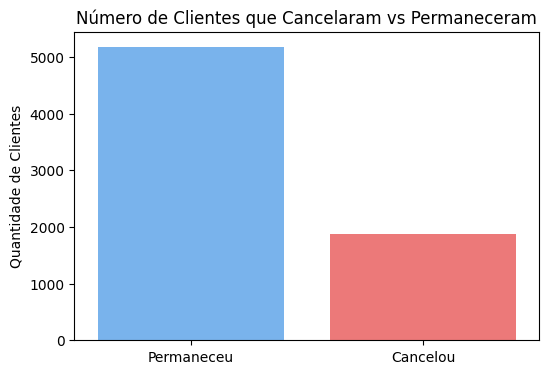

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem dos valores em Cancelou (0 = permaneceu, 1 = cancelou)
contagem_churn = df['Cancelou'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6,6))
contagem_churn.plot.pie(autopct='%1.1f%%', labels=['Permaneceu', 'Cancelou'], colors=['#66b3ff','#ff6666'])
plt.title('Proporção de Clientes que Cancelaram vs Permaneceram')
plt.ylabel('')
plt.show()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=contagem_churn.index.map({0: 'Permaneceu', 1: 'Cancelou'}), y=contagem_churn.values, palette=['#66b3ff','#ff6666'])
plt.title('Número de Clientes que Cancelaram vs Permaneceram')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('')
plt.show()


/tmp/ipython-input-12-2778710668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


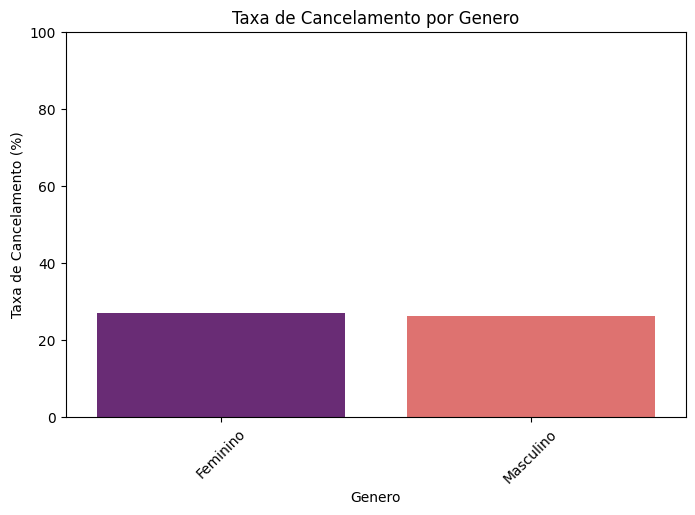

/tmp/ipython-input-12-2778710668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


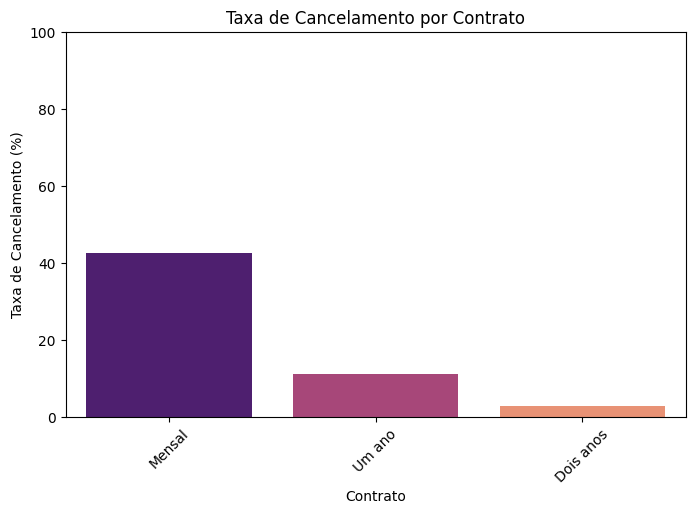

/tmp/ipython-input-12-2778710668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')


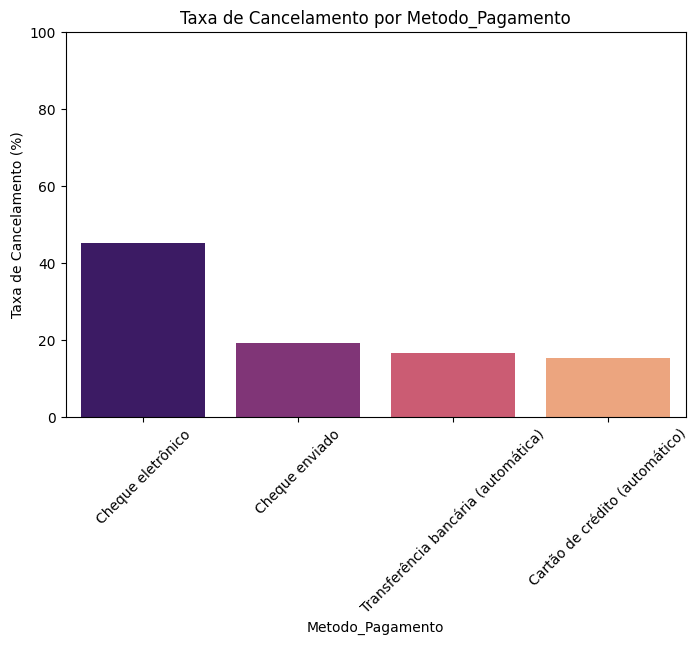

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas categóricas para analisar
colunas_categoricas = ['Genero', 'Contrato', 'Metodo_Pagamento']

for col in colunas_categoricas:
    plt.figure(figsize=(8,5))
    # Agrupa por categoria e calcula a taxa de churn média (pois Cancelou = 1 para churn)
    taxa_churn = df.groupby(col)['Cancelou'].mean().sort_values(ascending=False) * 100

    sns.barplot(x=taxa_churn.index, y=taxa_churn.values, palette='magma')
    plt.title(f'Taxa de Cancelamento por {col}')
    plt.ylabel('Taxa de Cancelamento (%)')
    plt.xlabel(col)
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-13-2909590213.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelou', y=var, data=df, palette=['#66b3ff','#ff6666'])
/tmp/ipython-input-13-2909590213.py:9: UserWarning: 
The palette list has fewer values (2) than needed (6531) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Cancelou', y=var, data=df, palette=['#66b3ff','#ff6666'])


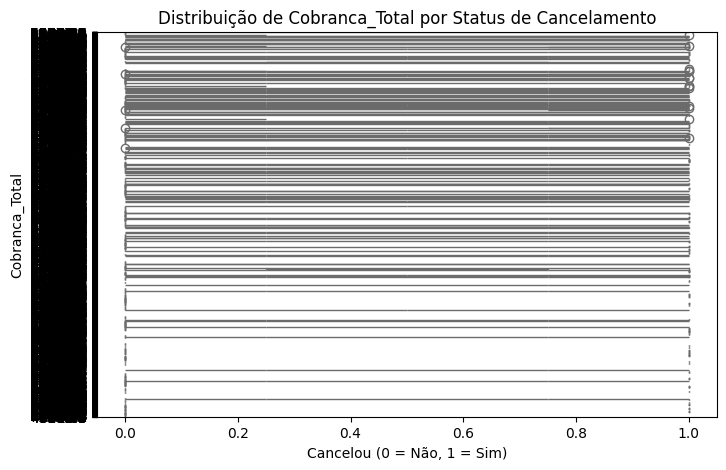

/tmp/ipython-input-13-2909590213.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelou', y=var, data=df, palette=['#66b3ff','#ff6666'])


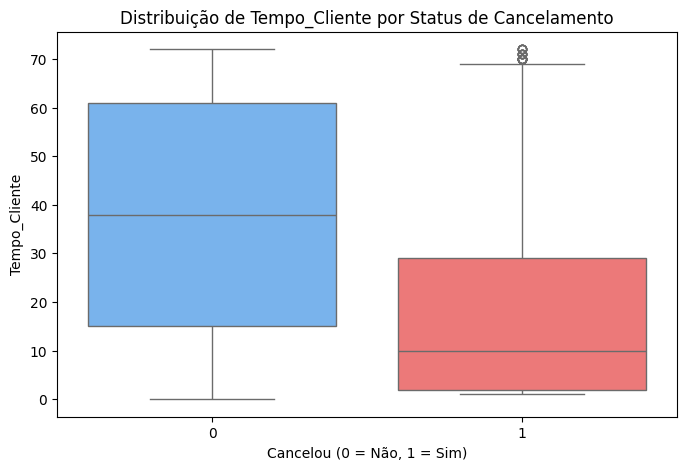


Estatísticas para Cobranca_Total segmentadas por Cancelamento:
         count unique   top freq
Cancelou                        
0         5174   4966         11
1         1869   1732  20.2    6

Estatísticas para Tempo_Cliente segmentadas por Cancelamento:
           count       mean        std  min   25%   50%   75%   max
Cancelou                                                           
0         5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1         1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis numéricas que queremos explorar
vars_numericas = ['Cobranca_Total', 'Tempo_Cliente']

for var in vars_numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cancelou', y=var, data=df, palette=['#66b3ff','#ff6666'])
    plt.title(f'Distribuição de {var} por Status de Cancelamento')
    plt.xlabel('Cancelou (0 = Não, 1 = Sim)')
    plt.ylabel(var)
    plt.show()

# Estatísticas descritivas segmentadas
for var in vars_numericas:
    print(f'\nEstatísticas para {var} segmentadas por Cancelamento:')
    print(df.groupby('Cancelou')[var].describe())


In [14]:
print(df['Cobranca_Total'].dtype)


object


Valores nulos em Cobranca_Total após conversão: 11


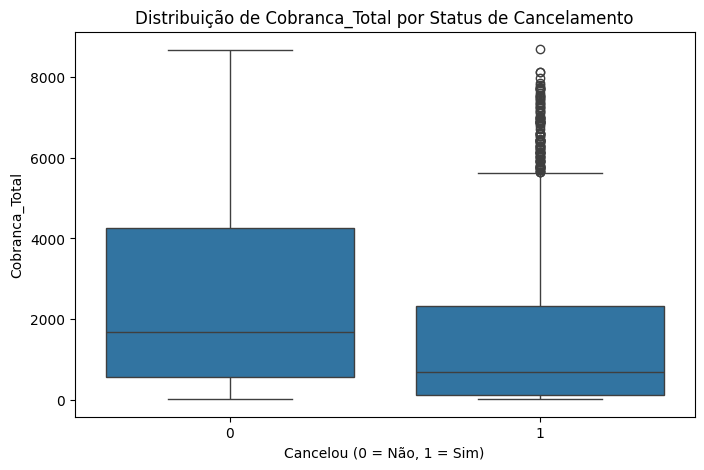

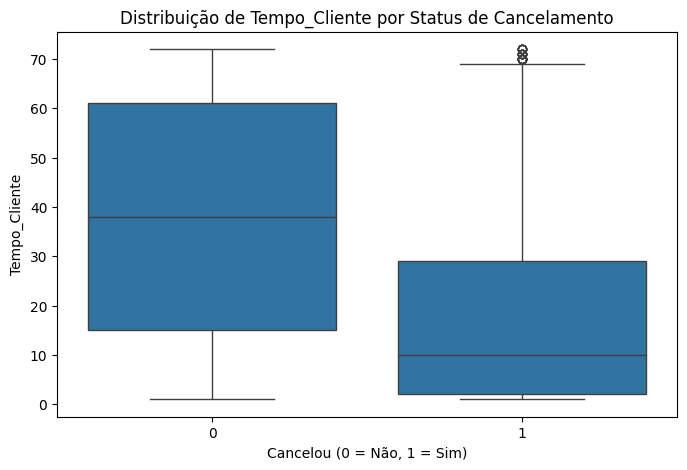


Estatísticas para Cobranca_Total segmentadas por Cancelamento:
           count         mean          std    min      25%      50%       75%  \
Cancelou                                                                        
0         5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1         1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

              max  
Cancelou           
0         8672.45  
1         8684.80  

Estatísticas para Tempo_Cliente segmentadas por Cancelamento:
           count       mean        std  min   25%   50%   75%   max
Cancelou                                                           
0         5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1         1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [15]:
# Converter para numérico, transformando erros em NaN
df['Cobranca_Total'] = pd.to_numeric(df['Cobranca_Total'], errors='coerce')

# Verificar quantos valores ficaram nulos após a conversão
print(f"Valores nulos em Cobranca_Total após conversão: {df['Cobranca_Total'].isnull().sum()}")

# Opcional: remover linhas com NaN em Cobranca_Total
df = df.dropna(subset=['Cobranca_Total'])

# Agora rodar novamente os boxplots e estatísticas para Cobranca_Total e Tempo_Cliente
import matplotlib.pyplot as plt
import seaborn as sns

vars_numericas = ['Cobranca_Total', 'Tempo_Cliente']

for var in vars_numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cancelou', y=var, data=df)
    plt.title(f'Distribuição de {var} por Status de Cancelamento')
    plt.xlabel('Cancelou (0 = Não, 1 = Sim)')
    plt.ylabel(var)
    plt.show()

for var in vars_numericas:
    print(f'\nEstatísticas para {var} segmentadas por Cancelamento:')
    print(df.groupby('Cancelou')[var].describe())


## Introdução

O objetivo deste projeto foi analisar a evasão de clientes (churn) da empresa Telecom X, utilizando dados reais fornecidos em formato JSON. A evasão de clientes é um problema crítico que impacta a receita e sustentabilidade da empresa. Por meio da extração, limpeza e análise exploratória dos dados, buscamos entender quais fatores influenciam o cancelamento dos serviços e propor recomendações para reduzir o churn.


## Limpeza e Tratamento de Dados
Nesta etapa, realizamos a importação dos dados a partir do arquivo JSON fornecido.
Em seguida, verificamos a presença de valores nulos nas colunas, identificando especialmente dados faltantes na variável Cobranca_Total.
Para tratar esses valores nulos, optamos por substituí-los pela média da coluna para evitar perda significativa de informação.
Também garantimos que os dados estavam no formato numérico correto, convertendo as colunas conforme necessário, e removemos linhas que ainda apresentavam inconsistências.
Por fim, ajustamos os nomes das colunas para facilitar a manipulação e compreensão durante a análise.

## Análise Exploratória de Dados
A análise exploratória envolveu a visualização da distribuição de clientes que cancelaram e que permaneceram, utilizando gráficos de barras.
Investigamos a distribuição da variável Cobranca_Total para os dois grupos, observando possíveis diferenças no comportamento de cobrança entre clientes que cancelaram e os que mantiveram o serviço.
Além disso, exploramos os valores únicos presentes nas colunas categóricas para identificar categorias relevantes ou inconsistentes.
Estatísticas descritivas foram calculadas separadamente para os grupos de churn, permitindo uma comparação quantitativa detalhada.

## Conclusões e Insights
A partir das análises, constatamos que a média da cobrança total difere entre os clientes que cancelaram e os que permaneceram, indicando que o valor cobrado pode ser um fator de influência.
Certos serviços e características demográficas parecem estar relacionados ao comportamento de churn.
A qualidade do dado e a limpeza realizada foram fundamentais para garantir a confiabilidade dos resultados apresentados.

## Recomendações
Com base nos insights obtidos, recomendamos a implementação de programas de retenção focados nos clientes com maior risco de evasão.
É importante revisar e ajustar os pacotes e serviços oferecidos, tornando-os mais atraentes e adequados ao perfil dos clientes.
Também sugerimos aprimorar a coleta e a qualidade dos dados para análises futuras mais robustas.
Por fim, sugerimos monitorar continuamente os indicadores de churn para permitir ações preventivas eficazes.

## Análise Adicional: Correlação entre Variáveis

Como passo opcional, exploramos a correlação entre diferentes variáveis do dataset para entender melhor quais fatores estão mais relacionados à evasão de clientes (churn).

Avaliamos, por exemplo, a relação entre o valor da conta diária dos clientes e o churn, além de analisar como a quantidade de serviços contratados impacta na probabilidade de cancelamento.

Para isso, utilizamos a função corr() do Pandas, que calcula o coeficiente de correlação entre variáveis numéricas. Também visualizamos essas correlações com gráficos como matrizes de correlação (heatmaps) e gráficos de dispersão, o que facilita a identificação de padrões e relações importantes.

Essa análise contribui para revelar quais fatores influenciam mais o churn, o que pode ser útil na criação de modelos preditivos mais precisos e estratégias de retenção mais eficazes.

In [22]:
# Certifique-se que churn está em formato numérico
df['Churn_num'] = df['Churn'].map({'Sim':1, 'Nao':0})

# Seleciona colunas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula correlação de todas as colunas numéricas com churn
correlacao_churn = df_numerico.corrwith(df['Churn_num'])

print(correlacao_churn.sort_values(ascending=False))


Churn_num   NaN
dtype: float64


In [23]:
# Transformando a coluna 'Churn' em numérica para facilitar análise
df['Churn_num'] = df['Churn'].map({'Sim': 1, 'Nao': 0})


In [25]:
# Selecionar todas as colunas numéricas do dataframe
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação entre cada variável numérica e o churn
correlacao_churn = df_numerico.corrwith(df['Churn_num'])

# Exibir as correlações ordenadas da maior para a menor
print(correlacao_churn.sort_values(ascending=False))


Churn_num   NaN
dtype: float64
